# EDA Zomato API Analysis


###  Data Exploration

In [273]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import skew
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)



In [274]:
# Load the dataset
zomato_df = pd.read_csv(r'zomato.csv', encoding='latin-1')


In [275]:
zomato_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.03,14.57,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.80,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.01,14.55,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.50,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.06,14.58,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.40,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.06,14.59,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.90,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.06,14.58,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.80,Dark Green,Excellent,229


In [276]:
zomato_df.shape

(9551, 21)

In [277]:
zomato_df.columns.values

array(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'], dtype=object)

In [7]:
# Checking the data types of all the columns
zomato_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [8]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
# Checking the descriptive statistics of numeric variables
zomato_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Average Cost for Two: The standard deviation is high ( $16121.18), indicating significant variability in the cost.

Price Range: The price range for most restaurants falls within 1 to 2.

Aggregate Rating: The average aggregate rating for restaurants is around 2.67 and the minimum rating is 0, and the maximum is 4.9 whicch  indicates a diverse range of restaurant ratings.

Votes:The standard deviation is relatively high ( 430.17), suggesting a wide variation in the number of votes and the average number of votes received by restaurants is approximately 156.91.

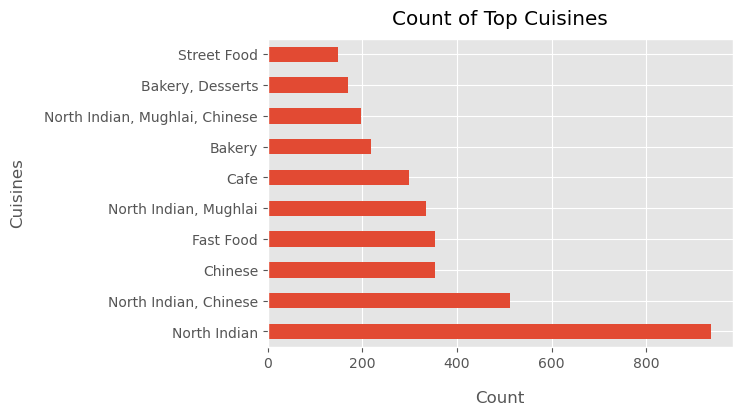

In [10]:
top_cuisines = zomato_df['Cuisines'].value_counts().head(10)
top_cuisines.plot(kind='barh', figsize=(6, 4))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Cuisines", labelpad=14)
plt.title("Count of Top Cuisines", y=1.02)
plt.show()



## Data Cleaning

In [23]:
# Create a copy of base data for manupulation & processing

zomato_df_u = zomato_df.copy()

In [24]:
zomato_df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [25]:
# check null values

zomato_df_u.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

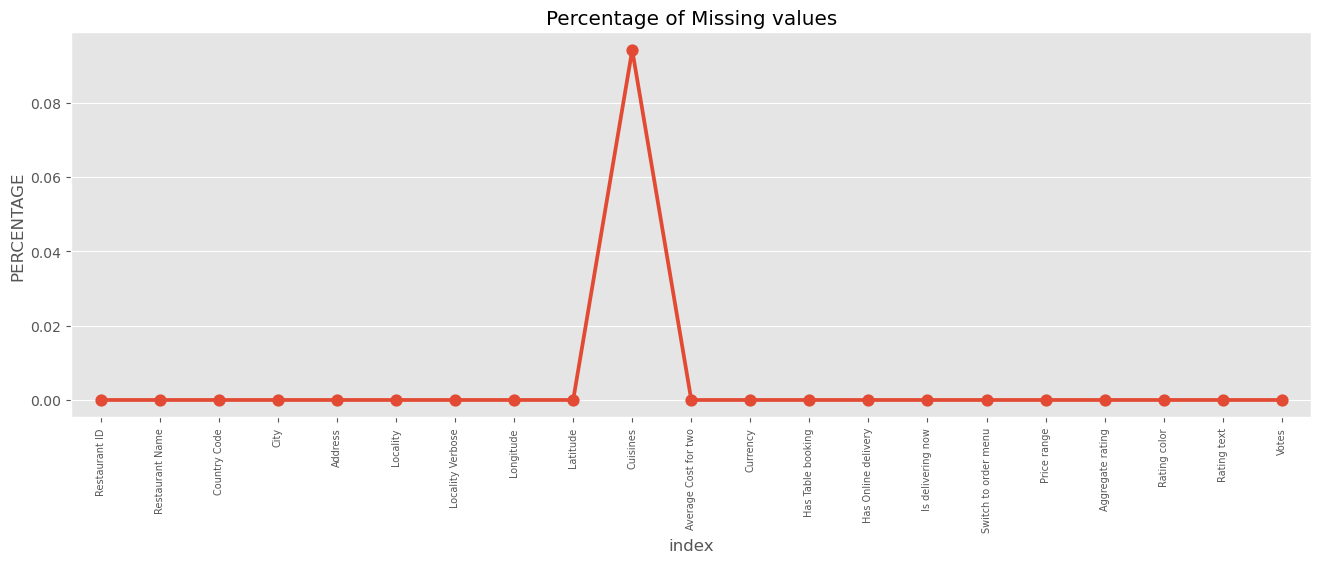

In [26]:
# check pecentage of missing data

missing = pd.DataFrame((zomato_df_u.isnull().sum()) * 100 / zomato_df_u.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [27]:
# Since the % of these records compared to total dataset is very low ie 0.09%, it is safe to ignore them.

zomato_df_u.dropna(how = 'any', inplace = True)

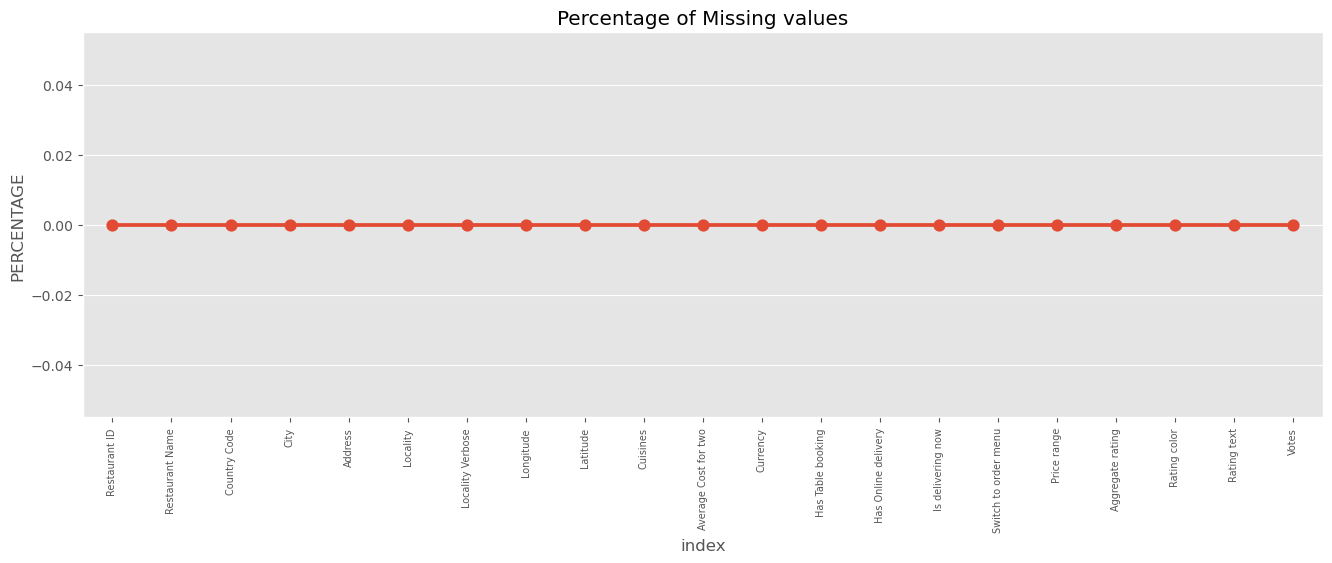

In [28]:
# confirm removal of null values

missing = pd.DataFrame((zomato_df_u.isnull().sum()) * 100 / zomato_df_u.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Remove columns not required for processing

In [29]:
zomato_df_u.columns.values

array(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'], dtype=object)

In [30]:
# check if there are duplicates
zomato_df_u.duplicated().sum()

0

In [31]:
zomato_df_u.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [237]:

zomato_df_u_2 = zomato_df_u.drop(['Currency','Longitude','Latitude',  'Country Code', 
                                  'Address', 'Locality Verbose',  
                            'Rating color'], axis=1)

In [238]:
zomato_df_u_2.head()

,Restaurant ID,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Yes,No,No,No,3,4.80,Excellent,314
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Yes,No,No,No,3,4.50,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Yes,No,No,No,4,4.40,Very Good,270
3,6318506,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,No,No,No,No,4,4.90,Excellent,365
4,6314302,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Yes,No,No,No,4,4.80,Excellent,229


In [242]:
# Renaming the columns
zomato_df_u_3 = zomato_df_u_2.rename(columns = {"Average Cost for two":"AVG Cost_2", "Has Table booking": "Table booking",
                                                "Has Online delivery":"Online delivery","Is delivering now": "Delivering now",
                                                "Aggregate rating": "AVG rating", "Switch to order menu": "order menu"})

In [243]:
zomato_df_u_3.head()

,Restaurant ID,Restaurant Name,City,Locality,Cuisines,AVG Cost_2,Table booking,Online delivery,Delivering now,order menu,Price range,AVG rating,Rating text,Votes
0,6317637,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Yes,No,No,No,3,4.80,Excellent,314
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Yes,No,No,No,3,4.50,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Yes,No,No,No,4,4.40,Very Good,270
3,6318506,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,No,No,No,No,4,4.90,Excellent,365
4,6314302,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Yes,No,No,No,4,4.80,Excellent,229


## Data Analysis & Visualization.

#### Detecting  outliers

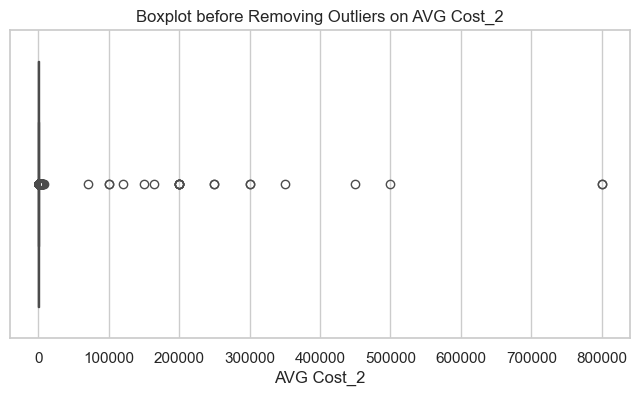

In [201]:

# Create a boxplot using seaborn
plt.figure(figsize=(8, 4))
sns.boxplot(x=zomato_df_u_3['AVG Cost_2'])
plt.title('Boxplot before Removing Outliers on AVG Cost_2')
plt.show()

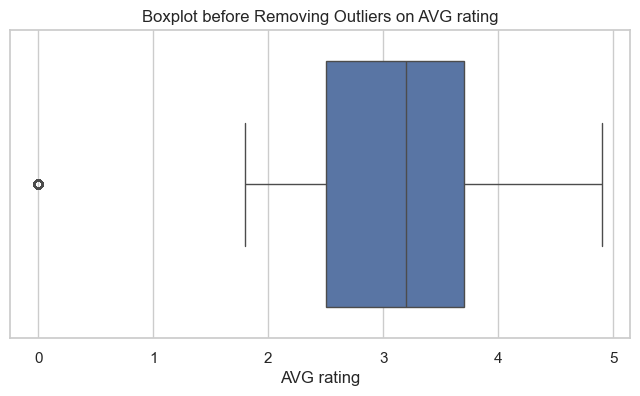

In [202]:

# Create a boxplot using seaborn
plt.figure(figsize=(8, 4))
sns.boxplot(x=zomato_df_u_3['AVG rating'])
plt.title('Boxplot before Removing Outliers on AVG rating')
plt.show()

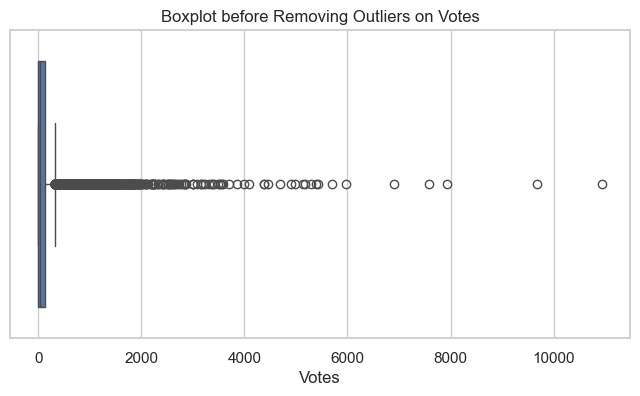

In [203]:

# Create a boxplot using seaborn
plt.figure(figsize=(8, 4))
sns.boxplot(x=zomato_df_u_3['Votes'])
plt.title('Boxplot before Removing Outliers on Votes')
plt.show()

In [204]:
# Function to Detection Outlier on one-dimentional datasets.
def remove_outliers(data, k=1.5):
    # Calculate quartiles using numpy
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Calculate interquartile range (IQR)
    IQR = Q3 - Q1

    # Calculate lower and upper fences
    lower_fence = Q1 - k * IQR
    upper_fence = Q3 + k * IQR

    # Filter the data to remove outliers
    filtered_data = data[(data >= lower_fence) & (data <= upper_fence)]
    
    return pd.Series(filtered_data)

In [245]:
# Create a copy of the DataFrame
zomato_df_u_4 = zomato_df_u_3.copy()

# Assuming df_cars_u is your DataFrame
zomato_df_u_4['AVG Cost_2_u'] = remove_outliers(zomato_df_u_4['AVG Cost_2'])
zomato_df_u_4['Votes_u'] = remove_outliers(zomato_df_u_4['Votes'])

In [206]:
# Imputeing NAN with Mean:


zomato_df_u_4['AVG Cost_2_u'].fillna(zomato_df_u_4['AVG Cost_2_u'].mean(), inplace=True)
zomato_df_u_4['Votes_u'].fillna(zomato_df_u_4['Votes_u'].mean(), inplace=True)


In [207]:
pd.set_option("display.float_format", lambda x: "%.2f" %x)

In [246]:
zomato_df_u_4.head()

,Restaurant ID,Restaurant Name,City,Locality,Cuisines,AVG Cost_2,Table booking,Online delivery,Delivering now,order menu,Price range,AVG rating,Rating text,Votes,AVG Cost_2_u,Votes_u
0,6317637,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Yes,No,No,No,3,4.80,Excellent,314,1100.00,314.00
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Yes,No,No,No,3,4.50,Excellent,591,1200.00,NaN
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Yes,No,No,No,4,4.40,Very Good,270,NaN,270.00
3,6318506,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,No,No,No,No,4,4.90,Excellent,365,NaN,NaN
4,6314302,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Yes,No,No,No,4,4.80,Excellent,229,NaN,229.00


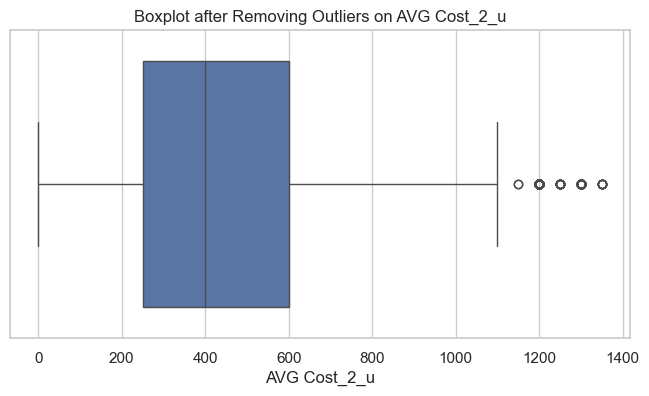

In [209]:
# Create a boxplot using seaborn
plt.figure(figsize=(8, 4))
sns.boxplot(x=zomato_df_u_4['AVG Cost_2_u'])
plt.title('Boxplot after Removing Outliers on AVG Cost_2_u')
plt.show()

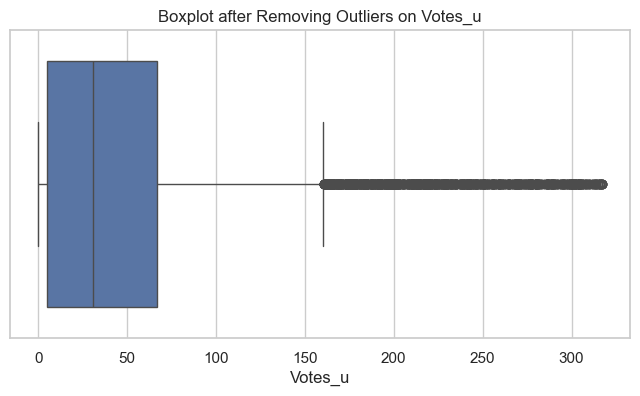

In [210]:
# Create a boxplot using seaborn
plt.figure(figsize=(8, 4))
sns.boxplot(x=zomato_df_u_4['Votes_u'])
plt.title('Boxplot after Removing Outliers on Votes_u')
plt.show()

In [211]:

# Drop unnecessary columns in zomato_df_u_4

zomato_df_u_4.drop(columns=['AVG Cost_2','Votes'], inplace=True)


In [269]:
zomato_df_u_4.head()

,Restaurant ID,Restaurant Name,City,Locality,Cuisines,AVG Cost_2,Table booking,Online delivery,Delivering now,order menu,Price range,AVG rating,Rating text,Votes,AVG Cost_2_u,Votes_u
0,6317637,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Yes,No,No,No,3,4.80,Excellent,314,1100.00,314.00
1,6304287,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Yes,No,No,No,3,4.50,Excellent,591,1200.00,NaN
2,6300002,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Yes,No,No,No,4,4.40,Very Good,270,NaN,270.00
3,6318506,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,No,No,No,No,4,4.90,Excellent,365,NaN,NaN
4,6314302,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Yes,No,No,No,4,4.80,Excellent,229,NaN,229.00


1.Number of restaurants in each location?

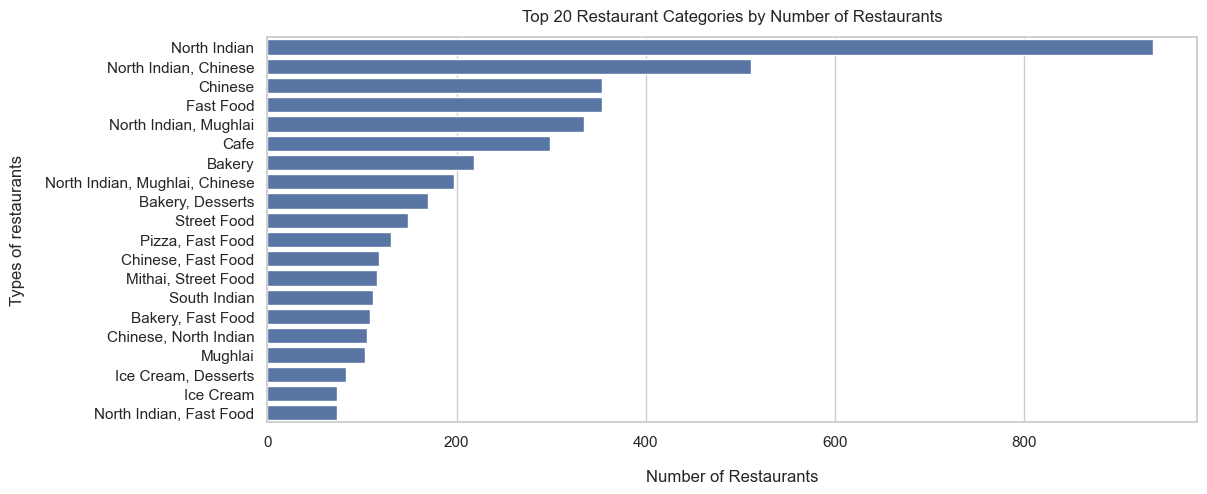

In [213]:

# Set the style for seaborn
sns.set(style="whitegrid")

# Specify the number of top restaurant categories to display
top_n_categories = 20

# Get the top N restaurant categories by count
top_categories = zomato_df_u_4['Cuisines'].value_counts().head(top_n_categories).index

# Filter the DataFrame to include only the top restaurant categories
top_categories_df = zomato_df_u_4[zomato_df_u_4['Cuisines'].isin(top_categories)]

# Plot the count of restaurants in each top category
plt.figure(figsize=(12, 5))
sns.countplot(y='Cuisines', data=top_categories_df, order=top_categories)
plt.xlabel('Number of Restaurants', labelpad=14)
plt.ylabel('Types of restaurants', labelpad=14)
plt.title(f'Top {top_n_categories} Restaurant Categories by Number of Restaurants', y=1.02)
plt.show()

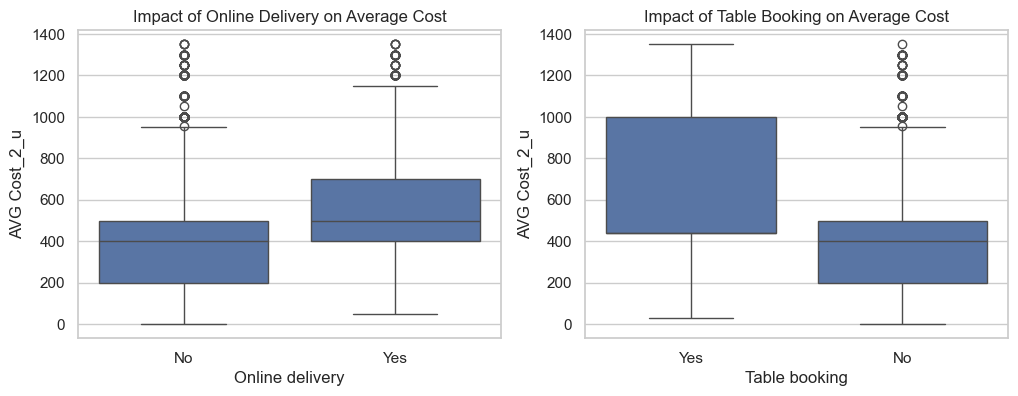

In [214]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x='Online delivery', y='AVG Cost_2_u', data=zomato_df_u_4, ax=axes[0])
sns.boxplot(x='Table booking', y='AVG Cost_2_u', data=zomato_df_u_4, ax=axes[1])
axes[0].set_title('Impact of Online Delivery on Average Cost')
axes[1].set_title('Impact of Table Booking on Average Cost')
plt.show()

## Insights

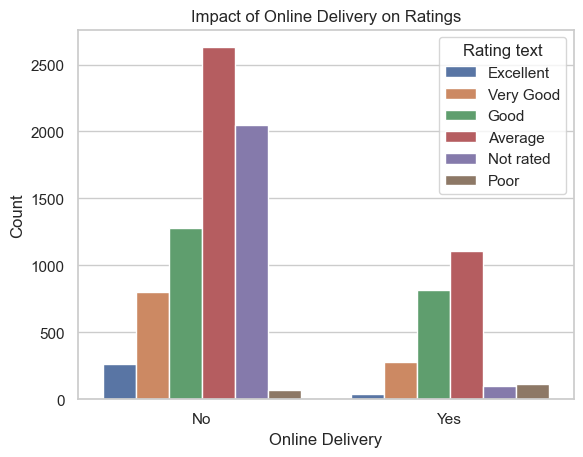

In [215]:
sns.countplot(x='Online delivery', data=zomato_df_u_4, hue='Rating text')

plt.title('Impact of Online Delivery on Ratings')
plt.xlabel('Online Delivery')
plt.ylabel('Count')
# plt.figure(figsize=(6, 4))
plt.show()

### Insights

There is a significant difference in the distribution of ratings between the two categories.This suggests that online delivery 
might have an impact on how customers rate restaurants.

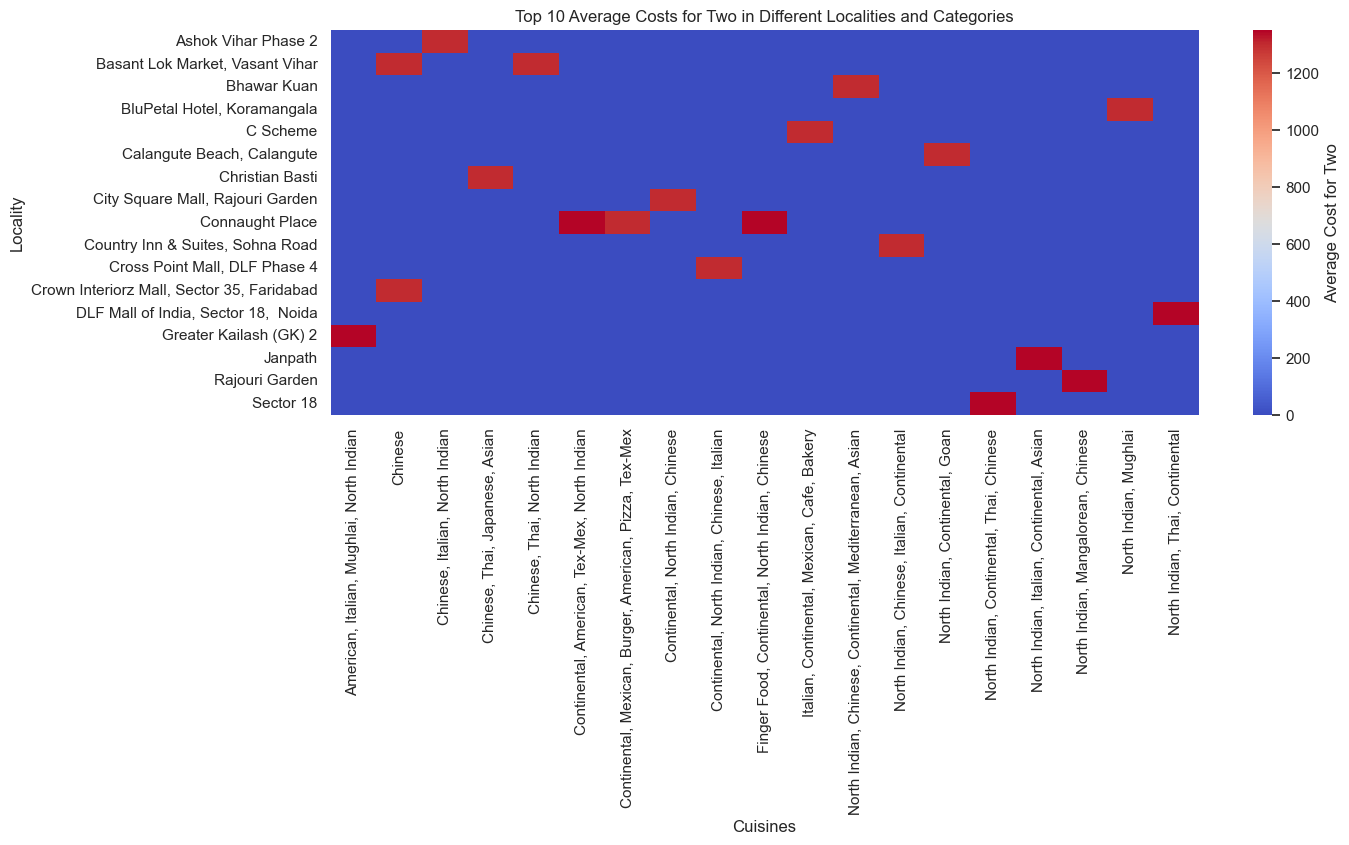

In [216]:
# Group by Locality and Category to get average cost statistics
average_cost_by_locality_category = zomato_df_u_4.groupby(['Locality', 'Cuisines'])['AVG Cost_2_u'].mean().reset_index()

# Get the top 10 average costs
top_10_average_cost = average_cost_by_locality_category.nlargest(20, 'AVG Cost_2_u')

# Create a heatmap to visualize average cost in different localities and categories
plt.figure(figsize=(14, 5))
heatmap_data = top_10_average_cost.pivot_table(index='Locality', columns='Cuisines',
                                               values='AVG Cost_2_u', aggfunc='mean').fillna(0)
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Average Cost for Two'})
plt.title('Top 10 Average Costs for Two in Different Localities and Categories')
plt.show()


### Insights

Places like The places with color codes above 1200   indicates locations where the average cost for two is relatively expensive
and where you a likely to add more  restaurant.

In [217]:
zomato_df_u_4.columns.values

array(['Restaurant ID', 'Restaurant Name', 'City', 'Locality', 'Cuisines',
       'Table booking', 'Online delivery', 'Delivering now',
       'Price range', 'AVG rating', 'Rating text', 'AVG Cost_2_u',
       'Votes_u'], dtype=object)

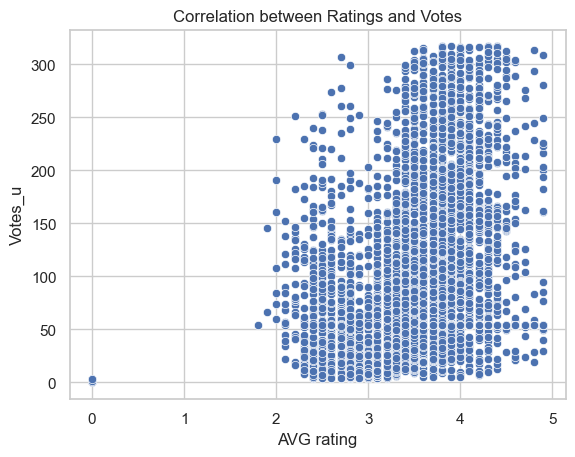

In [218]:
# visualizing ratings and votes correlation
sns.scatterplot(x='AVG rating', y='Votes_u', data=zomato_df_u_4)
plt.title('Correlation between Ratings and Votes')
plt.show()


Its noticed that restaurants with higher ratings are likely to be voted.

### Recommendations

In [ ]:
# Group by 'Table booking' and calculate average rating
avg_rating_with_table_booking = zomato_df_u_4.groupby('Table booking')['AVG rating'].mean()

# Display the result and plot a bar chart
avg_rating_with_table_booking.plot(kind='bar', figsize=(8, 5))
plt.xlabel('Has Table booking', labelpad=14)
plt.ylabel('Average Rating', labelpad=14)
plt.title('Average Rating for Restaurants with/without Table Booking', y=1.02)
plt.show()


### Insight

Average rating restaurants with book table facility is higher approximately 3.4

4.How many different categories of restaurants are present in different locations ?

In [ ]:
# Group by 'Locality' and count unique categories
categories_by_location = zomato_df_u_4.groupby('Locality')['Cuisines'].nunique()

# Display the result
display(categories_by_location)


5.In which locations people prefer to give feedback/vote and is it dependent on the number of restaurants?

In [ ]:
# Calculate the average number of votes per restaurant for each locality
average_votes_by_locality = zomato_df_u_4.groupby('Locality')['Votes_u'].mean()

# Identify locations with higher average votes
locations_with_high_votes = average_votes_by_locality[average_votes_by_locality > average_votes_by_locality.mean()]

# Ensure both series have the same index for correlation calculation
common_index = locations_with_high_votes.index.intersection(zomato_df_u_4['Locality'].value_counts().index)
locations_with_high_votes = locations_with_high_votes.loc[common_index]
num_restaurants = zomato_df_u_4['Locality'].value_counts().loc[common_index]

# Check if user engagement is dependent on the number of restaurants
correlation_votes_restaurants, _ = pearsonr(locations_with_high_votes, num_restaurants)

# Display results
print("Locations with Higher Average Votes:")
print(locations_with_high_votes)
print("\nCorrelation between Votes and Number of Restaurants:", correlation_votes_restaurants)


###  They are negatively correlated to each other.

6.Which restaurant categories has got comparatively higher ratings and what could be the common responsible factor behind it ?

In [226]:
# Calculate the average ratings and number of restaurants for each cuisine category
average_ratings_and_restaurants = zomato_df_u_4.groupby('Cuisines').agg({'AVG rating': 'mean', 'Restaurant ID': 'count', 'Price range': 'sum'})
average_ratings_and_restaurants.columns = ['Average Rating', 'No. Restaurants', 'Price Range']

# Identify top cuisines with higher average ratings
top_rated_cuisines = average_ratings_and_restaurants[average_ratings_and_restaurants['Average Rating'] == average_ratings_and_restaurants['Average Rating'].max()]

# Display results
print("Top Rated Cuisines:")
print(top_rated_cuisines)


Top Rated Cuisines:
                                 Average Rating  No. Restaurants  Price Range
Cuisines                                                                     
American, BBQ, Sandwich                    4.90                1            3
American, Burger, Grill                    4.90                1            3
American, Caribbean, Seafood               4.90                1            3
American, Coffee and Tea                   4.90                1            2
American, Sandwich, Tea                    4.90                1            2
BBQ, Breakfast, Southern                   4.90                1            1
Burger, Bar Food, Steak                    4.90                1            3
Continental, Indian                        4.90                1            3
European, Asian, Indian                    4.90                1            4
European, Contemporary                     4.90                1            4
European, German                           4

##### The common responsiblee factor behind it is its Price Range which is seen to be comparatively higher in  this disttrbution.

7.which category of restaurants are comparatively more expensive or cheaper?

#### Insights

1. Sunda, Indonesian  is comparatively higher with higher price range of 9. 
2. Italian, Deli  is cheaper with a price range of 1.

8.average cost of cuisines in different locations

In [228]:
# Calculate the average cost of cuisines in different locations
average_cost_by_locality = zomato_df_u_4.groupby('Locality')['AVG Cost_2_u'].mean()

# Display results
print("Average Cost of Cuisines in Different Locations:")
print(average_cost_by_locality)


Average Cost of Cuisines in Different Locations:
Locality
 ILD Trade Centre Mall, Sohna Road    575.00
12th Square Building, Banjara Hills   438.29
A Hotel, Gurdev Nagar                 800.00
ARSS Mall, Paschim Vihar              500.00
Aaya Nagar                            500.00
                                       ...  
ibis New Delhi, Aerocity              369.15
íguas Claras                          86.67
íayyolu                               35.00
íukurambar                            50.00
íìmitkí_y                              70.00
Name: AVG Cost_2_u, Length: 1206, dtype: float64


9.which cuisines have the most positive ratings?

In [229]:
# Filter data for positive ratings
positive_ratings_data = zomato_df_u_4[zomato_df_u_4['Rating text'].isin(['Excellent', 'Very Good'])]

# Calculate the count of positive ratings for each cuisine
positive_ratings_by_cuisine = positive_ratings_data.groupby('Cuisines')['Restaurant ID'].count()

# Identify cuisines with the most positive ratings
top_positive_ratings_cuisines = positive_ratings_by_cuisine[positive_ratings_by_cuisine == positive_ratings_by_cuisine.max()]

# Display results
print("Cuisines with the Most Positive Ratings:")
print(top_positive_ratings_cuisines)


Cuisines with the Most Positive Ratings:
Cuisines
Cafe    36
Name: Restaurant ID, dtype: int64


#####  t-Test 

H0. = The average ratings for restaurants with and without online order and table booking facilities are equal.

H1. = The average ratings for restaurants with and without online order and table booking facilities are not equal.

In [233]:
# Filter data for restaurants with online order and table booking facility
online_table_facility_data = zomato_df_u_4[(zomato_df_u_4['Online delivery'] == 'Yes') &
                                           (zomato_df_u_4['Table booking'] == 'Yes')]

# Extract ratings for restaurants with online order and table booking
ratings_with_facility = online_table_facility_data['AVG rating']

# Extract ratings for restaurants without online order or table booking
ratings_without_facility = zomato_df_u_4[
    (zomato_df_u_4['Online delivery'] == 'No') | (zomato_df_u_4['Table booking'] == 'No')
]['AVG rating']

# Perform t-test
t_stat, p_value = ttest_ind(ratings_with_facility, ratings_without_facility, equal_var=False)

# Display results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpretation: If p-value is less than your significance level (e.g., 0.05), you can reject the null hypothesis.


t-statistic: 30.36927439984935
p-value: 1.0447895021847742e-133


#### Insights

1. Since p-value is very low I reject the null hypothesis, indicating that there is a statistically significant difference
in average ratings.


2. Rrestaurants with online order and table booking facilities tend to have higher average ratings compared to those without.This finding aligns with hypothesis (a) that restaurants with these facilities perform better in terms of ratings.

#### ANOVA test

H0 =  Restaurants with engaging social activities have the same average ratings as restaurants without engaging social activities.

H1 = Restaurants with engaging social activities have higher average ratings compared to restaurants without engaging social activities.

### since anova is not working as expected, i use skewness to solve the problem.

In [267]:
# Extract ratings for restaurants with engaging social activities
ratings_social_activities = zomato_df_u_4[zomato_df_u_4['order menu'] == 'Yes']['AVG rating']

# Extract ratings for restaurants without engaging social activities
ratings_no_social_activities = zomato_df_u_4[zomato_df_u_4['order menu'] == 'No']['AVG rating']


In [268]:


# Calculate skewness for ratings with social activities
skewness_social_activities = skew(ratings_social_activities)

# Calculate skewness for ratings without social activities
skewness_no_social_activities = skew(ratings_without_social_activities)

# Display skewness values
print("Skewness for Ratings with Social Activities:", skewness_social_activities)
print("Skewness for Ratings without Social Activities:", skewness_no_social_activities)


Skewness for Ratings with Social Activities: nan
Skewness for Ratings without Social Activities: -0.9529023128493461


### Insiight

The skewness_social_activities < skewness_no_social_activities hence  it suggests that the distribution of ratings without 
social activities is more positively skewed.